In [2]:
#data cleanup
import pandas as pd
df_raw = pd.read_csv("Data.csv")

#get basic info. tells us there are no null values
df_raw.info()

#take a sample so that we can see what columns are categories
df_raw.sample(n=5)

#change dtype from object to category
digital_habits = pd.read_csv("Data.csv", dtype = {'gender':'category', 'region':'category', 'income_level':'category', 'daily_role':'category'})

#double check that there truly are no missing values
print(digital_habits.isna().sum())
#yep, no missing values. moving to a new cell.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [3]:
# Looking for outliers in data and removing them
#import needed libraries & read the file
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')

# find numeric columns, non numeric values cannot have outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns found:", numeric_cols)

# create function to find and remove outliers
def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    df_clean = dataframe.copy()
    for col in columns: #first find interquartile range for each column
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # create upper and lower limits
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # git rid of outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# remove outliers from data
df_cleaned = remove_outliers_iqr(df, numeric_cols, threshold=1.5)

print(f"Rows removed: {len(df) - len(df_cleaned)}")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# save data cleanup changes
df_cleaned.to_csv('Data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")


Numeric columns found: ['id', 'age', 'device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'social_media_mins', 'study_mins', 'physical_activity_days', 'sleep_hours', 'sleep_quality', 'anxiety_score', 'depression_score', 'stress_level', 'happiness_score', 'focus_score', 'high_risk_flag', 'productivity_score', 'digital_dependence_score']
Rows removed: 1207
Original shape: (3500, 24)
Cleaned shape: (2293, 24)

Cleaned data saved to 'cleaned_data.csv'


In [4]:
# find min and max for each numeric column with the cleaned data 
print("Minimum & maximum values for each column:")
print("="*50)

for col in df_cleaned.columns:
    if col in numeric_cols:
        min_val = df_cleaned[col].min()
        max_val = df_cleaned[col].max()
        print(f"\n{col}:")
        print(f"  Minimum: {min_val}")
        print(f"  Maximum: {max_val}")

Minimum & maximum values for each column:

id:
  Minimum: 1
  Maximum: 3500

age:
  Minimum: 13
  Maximum: 50

device_hours_per_day:
  Minimum: 0.48
  Maximum: 14.73

phone_unlocks:
  Minimum: 9
  Maximum: 303

notifications_per_day:
  Minimum: 24
  Maximum: 831

social_media_mins:
  Minimum: 0
  Maximum: 408

study_mins:
  Minimum: 0
  Maximum: 343

physical_activity_days:
  Minimum: 0.0
  Maximum: 7.0

sleep_hours:
  Minimum: 4.085625403545603
  Maximum: 10.733192741807692

sleep_quality:
  Minimum: 1.0
  Maximum: 5.0

anxiety_score:
  Minimum: 0.0
  Maximum: 15.41995019922936

depression_score:
  Minimum: 0.0
  Maximum: 21.0

stress_level:
  Minimum: 1.0
  Maximum: 10.0

happiness_score:
  Minimum: 0.0
  Maximum: 10.0

focus_score:
  Minimum: 0.0
  Maximum: 100.0

high_risk_flag:
  Minimum: 0
  Maximum: 0

productivity_score:
  Minimum: 41.0
  Maximum: 89.0

digital_dependence_score:
  Minimum: 5.6
  Maximum: 60.1


<function matplotlib.pyplot.show(close=None, block=None)>

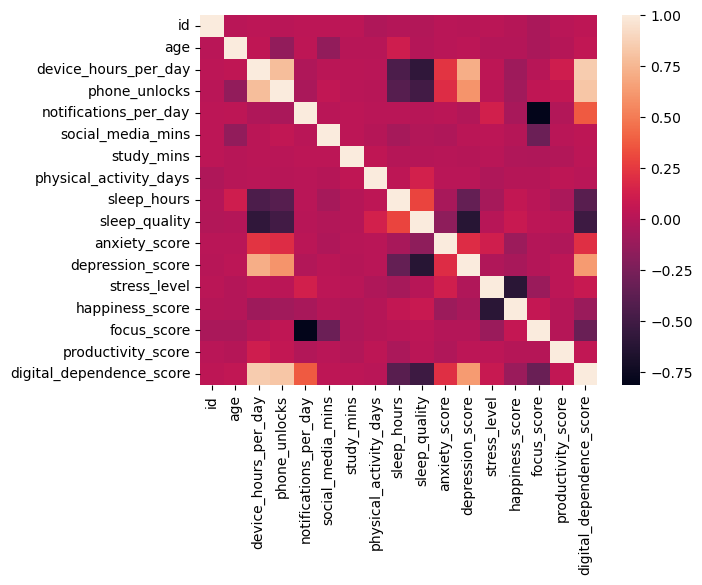

In [45]:
#let's look at overall correlation real quick
numeric_cols.remove('high_risk_flag')
corr = df_cleaned[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)
plt.show

In [23]:
#wow, this actually shows a lot about our data. as phoone unlocks and device hours per day increases, sleep quality and sleep hours both decrease. 
#as notifications per day increases, focus score decreases. but also, as sleep quality and hours decrease, depression increases. 
#the same negative correlation is found between stress and happiness, which makes sense. let's dive into some other details

#initialize screen time bins for ranges for data analysis
df_cleaned['screentime_bucket'] = pd.cut(df_cleaned['device_hours_per_day'], bins=[0, 3, 6, 9, float("inf")], labels = ["0-3", "3-6", "6-9", "9+"], right = False) 


#given men and women of the same screentime range, is either gender more prone to mental illness?
men_vs_women = df_cleaned.groupby(['gender', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(men_vs_women)

#this shows us that there is no obvious corelation between gender and depression or stress, but there is a potential correlation between gender and anxiety. let's graph this.


                          anxiety_score  depression_score  stress_level
gender screentime_bucket                                               
Female 0-3                     7.860873          1.818182      5.368170
       3-6                     6.423308          4.741667      4.068182
       6-9                     6.699682          8.670259      4.592149
       9+                      9.444724         13.082353      4.551098
Male   0-3                     5.303797          2.405063      4.030725
       3-6                     3.954545          4.636364      4.378329
       6-9                     3.708779          8.719486      4.240631
       9+                      6.900000         12.981250      4.510100


<function matplotlib.pyplot.show(close=None, block=None)>

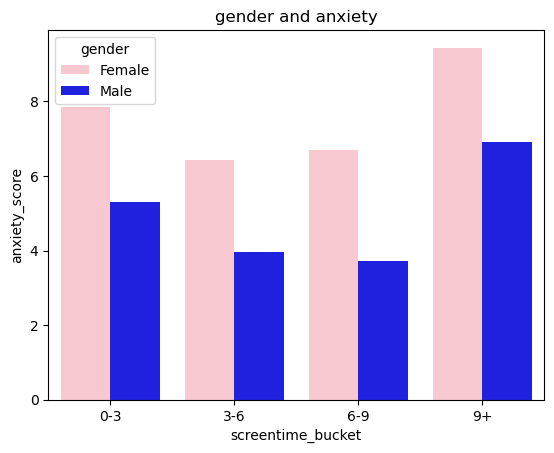

In [24]:
#gender and anxiety
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

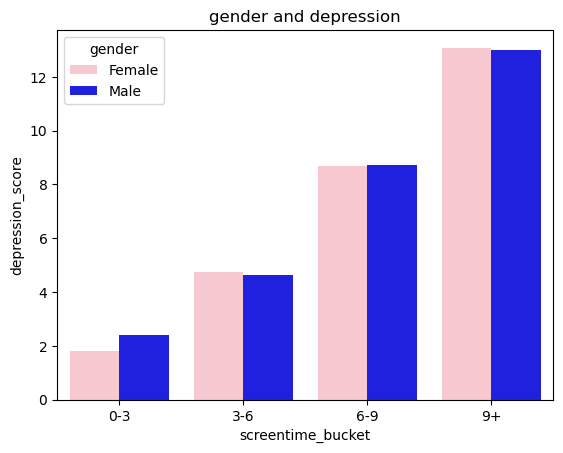

In [25]:
#gender and depression
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and depression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

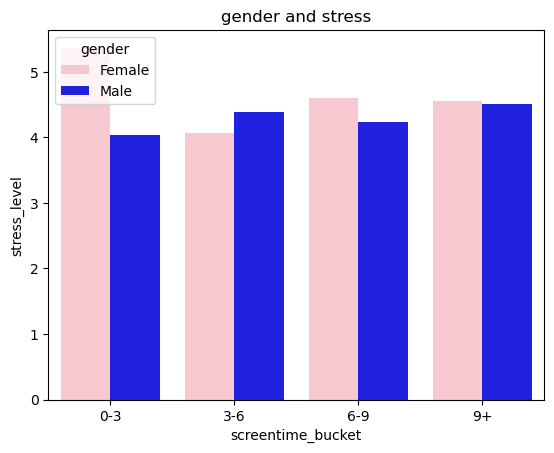

In [26]:
#gender and stress
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and stress')
plt.show

In [29]:
#let's do this same thing with education level

#given men and women of the same screentime range, is either gender more prone to mental illness?
education_level = df_cleaned.groupby(['education_level', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(education_level)

                                   anxiety_score  depression_score  \
education_level screentime_bucket                                    
Bachelor        0-3                     5.887635          1.875000   
                3-6                     5.162011          4.534606   
                6-9                     5.214716          8.867612   
                9+                      8.195724         12.708029   
High School     0-3                     6.634054          2.489362   
                3-6                     5.369919          4.925267   
                6-9                     5.146054          8.650350   
                9+                      8.476621         13.289720   
Master          0-3                     6.738603          2.137931   
                3-6                     5.504837          4.630303   
                6-9                     5.294475          8.573964   
                9+                      7.930803         13.017241   
PhD             0-3 

<function matplotlib.pyplot.show(close=None, block=None)>

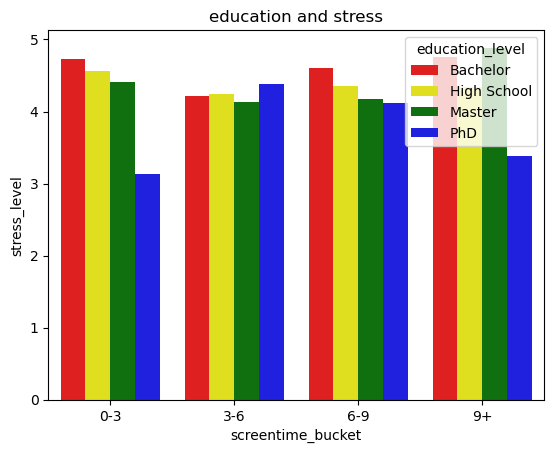

In [33]:
#this is pretty hard to read... let's graph it

sns.barplot(education_level, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and stress')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

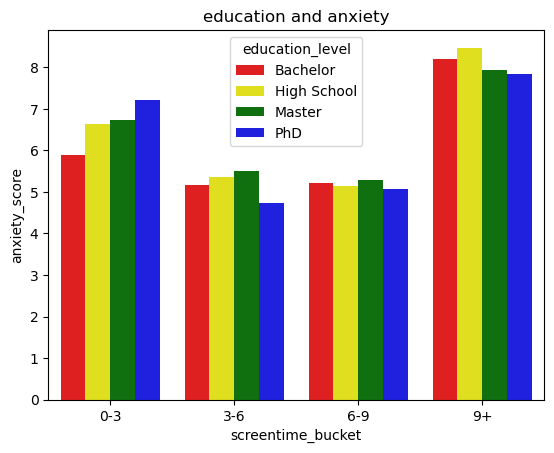

In [34]:
#anxiety?

sns.barplot(education_level, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

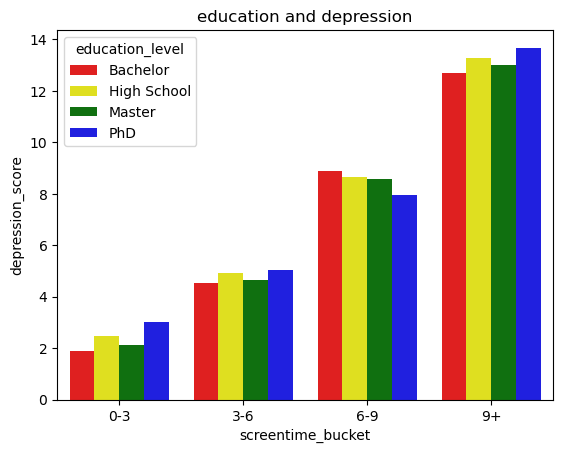

In [35]:
#depression?

sns.barplot(education_level, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and depression')
plt.show

In [47]:
#let's look at age now
df_cleaned['age_bucket'] = pd.cut(df_cleaned['age'], bins=[13, 18, 25, 30, 35, 40, 45, 50, float("inf")], labels = ["teenager", "college-aged", "25-30", "30-35", "35-40", "40-45", "45-50", "50+"], right = False)

age_and_screentime = df_cleaned.groupby(['age_bucket', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(age_and_screentime)

                                anxiety_score  depression_score  stress_level
age_bucket   screentime_bucket                                               
teenager     0-3                     6.789163          2.250000      4.670185
             3-6                     5.293823          4.983051      4.729333
             6-9                     4.985934          9.026786      4.330678
             9+                      8.240900         12.456522      4.216065
college-aged 0-3                     6.156930          2.116279      4.547166
             3-6                     5.354776          4.479853      4.088047
             6-9                     4.985426          8.671875      4.599516
             9+                      8.115472         13.023256      5.071195
25-30        0-3                     6.904016          2.320000      4.704151
             3-6                     5.352535          4.686747      4.016276
             6-9                     5.377689          8.609756 

In [ ]:
#continue with graphs later